## Python Data fitting with various functions - HW 11 part 2 
Due Friday Nov 10, 2023


Dowload the data "miniDR17.fits" from the TCU Online Week 12:<br>
<i>NOTE: it is a large-ish file and may take a while.</i>

**However, this is a small version of the full science data file (4 GB) which can be found at:**<br>
https://data.sdss.org/sas/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/allStar-dr17-synspec_rev1.fits


You will be using the same data "miniDR17.fits" from the TCU Online Week 12:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outliers!!!!  If you are not sure, ask!!!</b>). 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[0,0]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))

def mcFitLog(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0, )
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [2]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISITS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

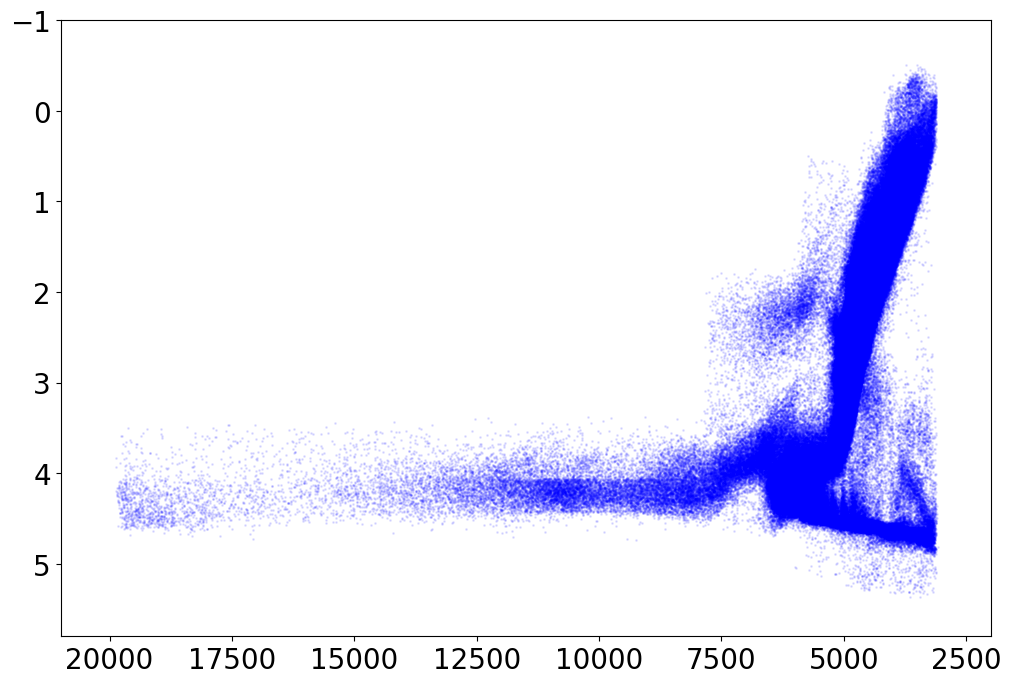

In [3]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 1

Fit a linear, polynomial (poly2), and a polynomial (poly3) functions and to the following selections of the data:
1. Select stars only with with $ GLAT > 20$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend?)

In [ ]:
#mask

newct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & \
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & \
     (star['GLAT'] > 20) & (~np.isnan(star['O_FE'])) & (np.abs(star['O_FE']) < 9999) & (~np.isnan(star['Fe_H'])) & (np.abs(star['Fe_H']) < 9999)
newcut1 = np.where(newct1)[0]

#fits

slope, intercept = mcFit2(linear, star['Fe_H'][newcut1], star['O_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                          star['O_FE_ERR'][newcut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

polyA, polyB, polyC,  = mcFit3(poly2, star['Fe_H'][newcut1], star['O_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                         star['O_FE'][newcut1],p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

poly3A, poly3B, poly3C, poly3D  = mcFit4(poly3, star['Fe_H'][newcut1], star['O_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                         star['O_FE'][newcut1],p0=[1,1,1,1])
print(f'POLY3: {poly3A:.3f}, {poly3B:.3f}, {poly3C:.3f}, {poly3D:.3f}')

#plotting

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(-3,1.5,1000)

#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='Fit: linear')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='Fit: poly2')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, poly3A, poly3B, poly3C, poly3D), label='Fit: poly3')

plt.legend(loc='best', fontsize=18)

ax1.errorbar((star['Fe_H'][newcut1]),star['O_FE'][newcut1], xerr=(star['Fe_H_ERR'][newcut1]),
             yerr=(np.abs(star['O_FE_ERR'][newcut1])), ecolor='grey',fmt='none', capsize=5, zorder=0)
ax1.scatter(star['Fe_H'][newcut1],star['O_FE'][newcut1],s=1,c='b',alpha=0.1)


## DATA FIT 2

Fit a linear, polynomial (poly2), and a polynomial (poly3) functions and to the following selections of the data:
2. Select stars only with with $-1< GLAT < 1$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend?)

In [ ]:
#mask

newct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & \
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & \
     (star['GLAT'] > 20) & (~np.isnan(star['O_FE'])) & (np.abs(star['O_FE']) < 9999) & (~np.isnan(star['Fe_H'])) & (np.abs(star['Fe_H']) < 9999)
newcut1 = np.where(newct1)[0]

#fits

slope, intercept = mcFit2(linear, star['Fe_H'][newcut1], star['O_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                          star['O_FE_ERR'][newcut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

polyA, polyB, polyC,  = mcFit3(poly2, star['Fe_H'][newcut1], star['O_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                         star['O_FE'][newcut1],p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

poly3A, poly3B, poly3C, poly3D  = mcFit4(poly3, star['Fe_H'][newcut1], star['O_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                         star['O_FE'][newcut1],p0=[1,1,1,1])
print(f'POLY3: {poly3A:.3f}, {poly3B:.3f}, {poly3C:.3f}, {poly3D:.3f}')

#plotting

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(-3,1.5,1000)

#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='Fit: linear')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='Fit: poly2')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, poly3A, poly3B, poly3C, poly3D), label='Fit: poly3')

plt.legend(loc='best', fontsize=18)

ax1.errorbar((star['Fe_H'][newcut1]),star['O_FE'][newcut1], xerr=(star['Fe_H_ERR'][newcut1]),
             yerr=(np.abs(star['O_FE_ERR'][newcut1])), ecolor='grey',fmt='none', capsize=5, zorder=0)
ax1.scatter(star['Fe_H'][newcut1],star['O_FE'][newcut1],s=1,c='b',alpha=0.1)


## DATA FIT 3

Fit a linear, polynomial (poly3), and a exponetial functions and to the following selections of the data:
3. Select stars only with with $340 < GLON < 360$ <br>
   __Fit TEFF,  (TEFF\_ERR)  vs.  LOGG (LOGG\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend?)

LINEAR: 0.000, 0.354
EXPONENTIAL: -68.392, -0.000, -1.899, 4.729
POLY3: 0.000, -0.000, 0.002, -4.024


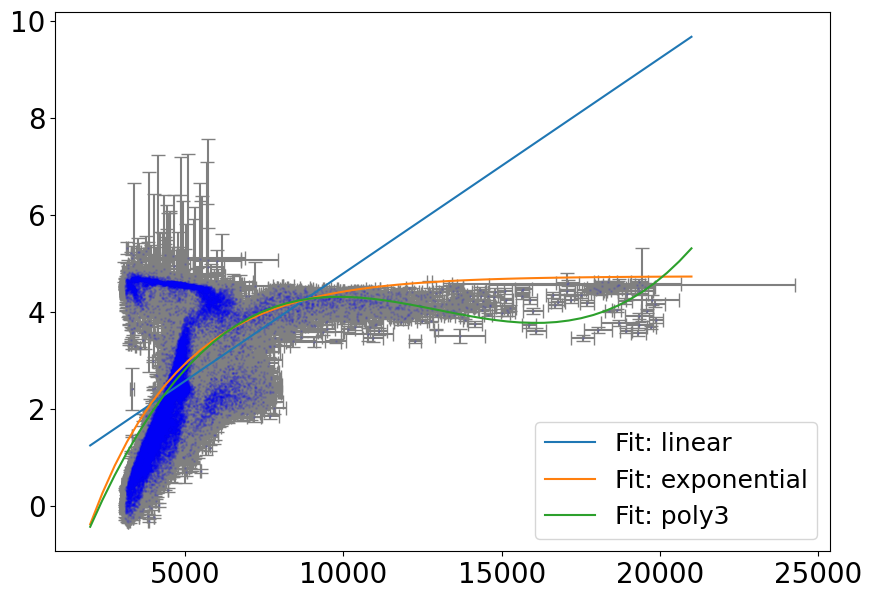

In [32]:
#mask

newct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & \
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & \
     (star['GLON'] > 340) & (star['GLON'] < 360) & (~np.isnan(star['TEFF'])) & (~np.isnan(star['LOGG'])) #& (np.abs(star['TEFF']) < 9999) & (np.abs(star['LOGG']) < 9999)
newcut1 = np.where(newct1)[0]

#fits

slope, intercept = mcFit2(linear, star['TEFF'][newcut1], star['LOGG'][newcut1], star['TEFF_ERR'][newcut1], \
                         star['LOGG_ERR'][newcut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

expA, expB, expC, expD  = mcFit4(exponential, star['TEFF'][newcut1], star['LOGG'][newcut1], star['TEFF_ERR'][newcut1], \
                         star['LOGG_ERR'][newcut1],p0=[-73,-0.00035,-1.9,4.4])
print(f'EXPONENTIAL: {expA:.3f}, {expB:.3f}, {expC:.3f}, {expD:.3f}')

poly3A, poly3B, poly3C, poly3D  = mcFit4(poly3, star['TEFF'][newcut1], star['LOGG'][newcut1], star['TEFF_ERR'][newcut1], \
                         star['LOGG_ERR'][newcut1],p0=[1,1,1,1])
print(f'POLY3: {poly3A:.3f}, {poly3B:.3f}, {poly3C:.3f}, {poly3D:.3f}')

#plotting

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(21000,2000)

#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='Fit: linear')
#exponential fit
ax1.plot(x_plot,exponential(x_plot, expA, expB, expC, expD), label='Fit: exponential')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, poly3A, poly3B, poly3C, poly3D), label='Fit: poly3')

plt.legend(loc='best', fontsize=18)

ax1.errorbar((star['TEFF'][newcut1]),star['LOGG'][newcut1], xerr=(star['TEFF_ERR'][newcut1]),
             yerr=(np.abs(star['LOGG_ERR'][newcut1])), ecolor='grey',fmt='none', capsize=5, zorder=0)
ax1.scatter(star['TEFF'][newcut1],star['LOGG'][newcut1],s=1,c='b',alpha=0.1)


## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:
4. Select stars only with with $DEC < -50$ and $50 < RA < 120$ <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (J - K) (J\_ERR, K\_ERR)__<br>
<br>
NOTE: you will have to create a (J-K) error:  JK_ERR = np.sqrt( J\_ERR^2 + K\_ERR^2 )<br> 

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend?)

LINEAR: -0.000, 1.907
POLY2: 0.000, -0.001, 3.050
POLY3: -0.000, 0.000, -0.001, 3.908


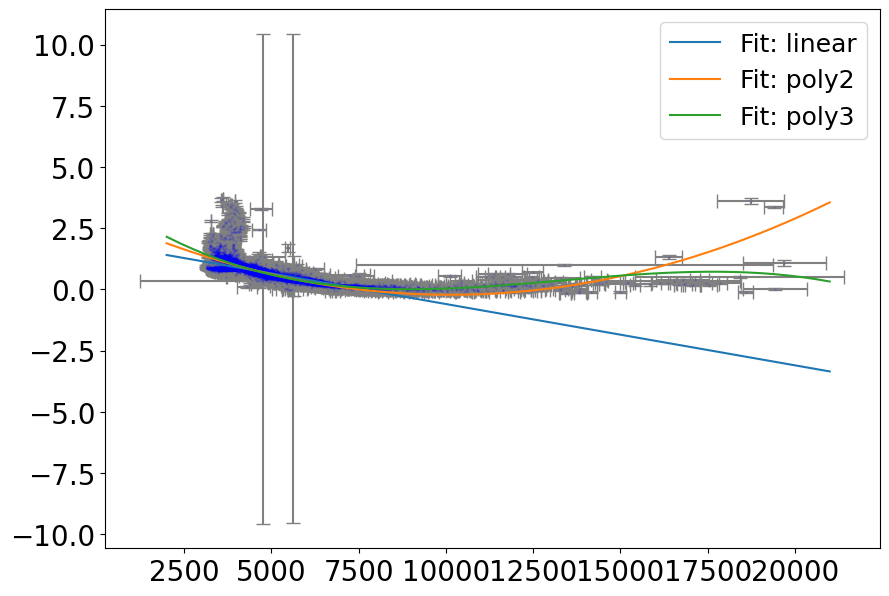

In [105]:
#mask

newct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & \
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & \
     (star['DEC'] < -50) & (star['RA'] < 120) & (star['RA'] > 50) & \
     (~np.isnan(star['J_ERR'])) & (~np.isnan(star['K_ERR'])) & (~np.isnan(star['TEFF_ERR'])) & \
     (~np.isnan(star['J'])) & (~np.isnan(star['K'])) & (~np.isnan(star['TEFF'])) #& (np.abs(star['TEFF']) < 9999) & (np.abs(star['LOGG']) < 9999)
     
newcut1 = np.where(newct1)[0]

#creating data

JK_ERR = np.sqrt((star['J_ERR'][newcut1])**2 + (star['K_ERR'][newcut1])**2)
JK = star['J'][newcut1] - star['K'][newcut1]

#fits

slope, intercept = mcFit2(linear, star['TEFF'][newcut1], JK, star['TEFF_ERR'][newcut1], \
                         JK_ERR, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

polyA, polyB, polyC,  = mcFit3(poly2, star['TEFF'][newcut1], JK, star['TEFF_ERR'][newcut1], \
                         JK_ERR,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

poly3A, poly3B, poly3C, poly3D  = mcFit4(poly3, star['TEFF'][newcut1], JK, star['TEFF_ERR'][newcut1], \
                         JK_ERR,p0=[-1,0.5,1,10])
print(f'POLY3: {poly3A:.3f}, {poly3B:.3f}, {poly3C:.3f}, {poly3D:.3f}')

#plotting

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(21000,2000)

#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='Fit: linear')
#exponential fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='Fit: poly2')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, poly3A, poly3B, poly3C, poly3D), label='Fit: poly3')

plt.legend(loc='best', fontsize=18)

ax1.errorbar((star['TEFF'][newcut1]),JK, xerr=(star['TEFF_ERR'][newcut1]),
             yerr=(np.abs(JK_ERR)), ecolor='grey',fmt='none', capsize=5, zorder=0)
ax1.scatter(star['TEFF'][newcut1],JK,s=1,c='b',alpha=0.1)

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend?)

LINEAR: -0.001, -3.966
COSINE: 49.826, 0.023, 0.863, 0.584
POLY3: -0.000, 0.014, -1.781, 27.971


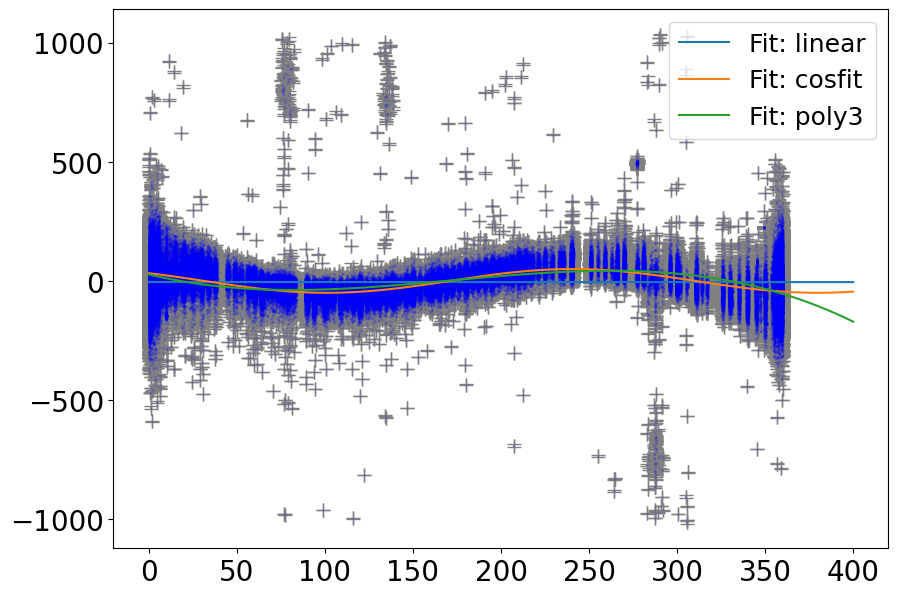

In [78]:
#mask

newct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & \
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & \
     (star['GLAT'] > -10) & (star['GLAT'] < 10) & (~np.isnan(star['GLON'])) & (~np.isnan(star['VHELIO_AVG'])) #& (np.abs(star['TEFF']) < 9999) & (np.abs(star['LOGG']) < 9999)
newcut1 = np.where(newct1)[0]

#fits

slope, intercept = mcFit2(linear, star['GLON'][newcut1], star['VHELIO_AVG'][newcut1], 0, \
                         star['VERR'][newcut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

cosA, cosB, cosC, cosD  = mcFit4(cosfit, star['GLON'][newcut1], star['VHELIO_AVG'][newcut1], 0, \
                         star['VERR'][newcut1],p0=[100,0.026,0,0])
print(f'COSINE: {cosA:.3f}, {cosB:.3f}, {cosC:.3f}, {cosD:.3f}')

poly3A, poly3B, poly3C, poly3D  = mcFit4(poly3, star['GLON'][newcut1], star['VHELIO_AVG'][newcut1], 0, \
                         star['VERR'][newcut1],p0=[1,1,1,1])
print(f'POLY3: {poly3A:.3f}, {poly3B:.3f}, {poly3C:.3f}, {poly3D:.3f}')

#plotting

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(0,400,400)

#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='Fit: linear')
#cosine fit
ax1.plot(x_plot,cosfit(x_plot, cosA, cosB, cosC, cosD), label='Fit: cosfit')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, poly3A, poly3B, poly3C, poly3D), label='Fit: poly3')

plt.legend(loc='best', fontsize=18)

ax1.errorbar((star['GLON'][newcut1]),star['VHELIO_AVG'][newcut1], xerr=0,
             yerr=(np.abs(star['VERR'][newcut1])), ecolor='grey',fmt='none', capsize=5, zorder=0)
ax1.scatter(star['GLON'][newcut1],star['VHELIO_AVG'][newcut1],s=1,c='b',alpha=0.1)


## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend?)

LINEAR: -0.138, 9.946
EXPONENTIAL: 11524.393, -0.100, -76.802, 9.148
POLY3: -0.000, 0.007, -0.289, 10.444


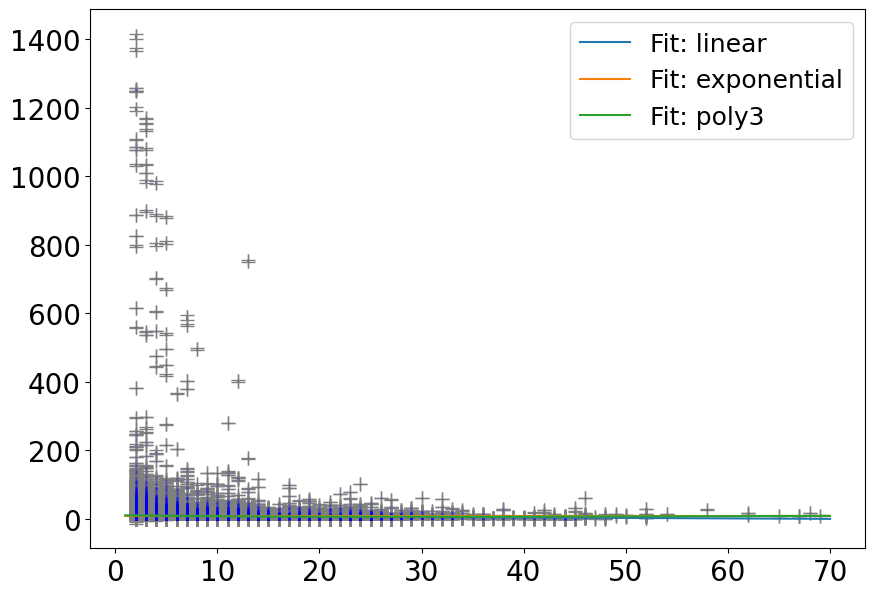

In [103]:
#mask

newct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & \
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & \
     (star['NVISITS'] >= 1) & (~np.isnan(star['NVISITS'])) & (~np.isnan(star['VSCATTER'])) & (star['VSCATTER'] > 1)
newcut1 = np.where(newct1)[0]

#fits

slope, intercept = mcFit2(linear, star['NVISITS'][newcut1], star['VSCATTER'][newcut1], 0, \
                         star['VERR'][newcut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

expA, expB, expC, expD  = mcFit4(exponential, star['NVISITS'][newcut1], star['VSCATTER'][newcut1], 0, \
                         star['VERR'][newcut1],p0=[150,-0.1,0,0])
print(f'EXPONENTIAL: {expA:.3f}, {expB:.3f}, {expC:.3f}, {expD:.3f}')

poly3A, poly3B, poly3C, poly3D  = mcFit4(poly3, star['NVISITS'][newcut1], star['VSCATTER'][newcut1], 0, \
                         star['VERR'][newcut1],p0=[1,1,1,1])
print(f'POLY3: {poly3A:.3f}, {poly3B:.3f}, {poly3C:.3f}, {poly3D:.3f}')

#plotting

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(1,70,70)

#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='Fit: linear')
#exponential fit
ax1.plot(x_plot,exponential(x_plot, expA, expB, expC, expD), label='Fit: exponential')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, poly3A, poly3B, poly3C, poly3D), label='Fit: poly3')

plt.legend(loc='best', fontsize=18)

ax1.errorbar((star['NVISITS'][newcut1]),star['VSCATTER'][newcut1], xerr=0,
             yerr=(np.abs(star['VERR'][newcut1])), ecolor='grey',fmt='none', capsize=5, zorder=0)
ax1.scatter(star['NVISITS'][newcut1],star['VSCATTER'][newcut1],s=1,c='b',alpha=0.1)


#these best fits look stupid but tbh I can't tell the density of the data points so who am I to judge?

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:
7. __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>
<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend?)

LINEAR: 0.013, 0.016
POLY2: 0.024, 0.038, 0.017
POLY3: -0.022, -0.019, 0.026, 0.018


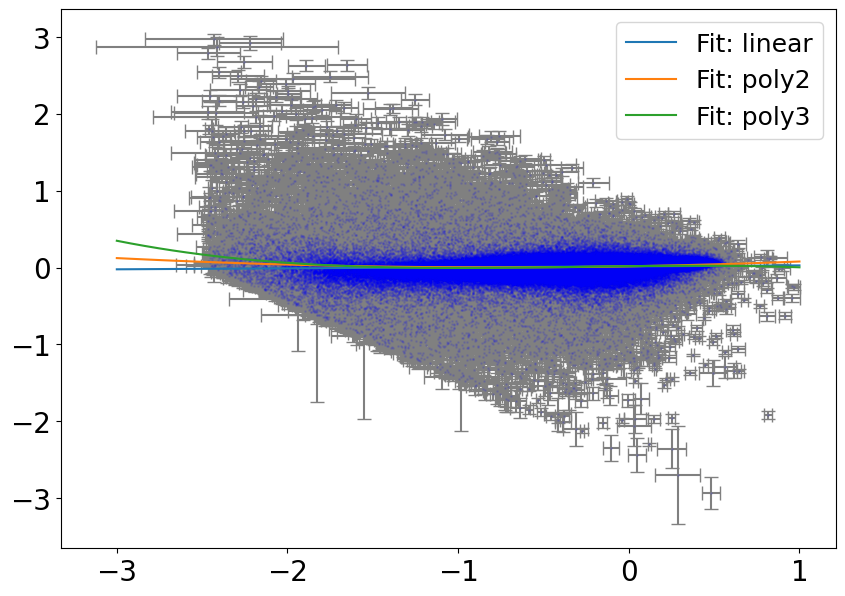

In [99]:
#mask

newct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & \
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & \
     (~np.isnan(star['Fe_H'])) & (~np.isnan(star['NI_FE'])) & (np.abs(star['Fe_H_ERR']) < 1.5)
newcut1 = np.where(newct1)[0]

#fits

slope, intercept = mcFit2(linear, star['Fe_H'][newcut1], star['NI_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                         star['NI_FE_ERR'][newcut1], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

polyA, polyB, polyC  = mcFit3(poly2, star['Fe_H'][newcut1], star['NI_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                         star['NI_FE_ERR'][newcut1],p0=[150,-0.1,0])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

poly3A, poly3B, poly3C, poly3D  = mcFit4(poly3, star['Fe_H'][newcut1], star['NI_FE'][newcut1], star['Fe_H_ERR'][newcut1], \
                         star['NI_FE_ERR'][newcut1],p0=[1,1,1,1])
print(f'POLY3: {poly3A:.3f}, {poly3B:.3f}, {poly3C:.3f}, {poly3D:.3f}')

#plotting

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

x_plot = np.linspace(-3,1)

#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='Fit: linear')
#exponential fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='Fit: poly2')
#poly3 fit
ax1.plot(x_plot,poly3(x_plot, poly3A, poly3B, poly3C, poly3D), label='Fit: poly3')

plt.legend(loc='best', fontsize=18)

ax1.errorbar((star['Fe_H'][newcut1]),star['NI_FE'][newcut1], xerr=(np.abs(star['Fe_H_ERR'][newcut1])),
             yerr=(np.abs(star['NI_FE_ERR'][newcut1])), ecolor='grey',fmt='none', capsize=5, zorder=0)
ax1.scatter(star['Fe_H'][newcut1],star['NI_FE'][newcut1],s=1,c='b',alpha=0.1)
